# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [104]:
#Examine the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [105]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Excercise 1: Is the data normally distributed?

$H_{0}$: The data is normally distributed.

Text(0.5, 1.0, 'Temperature Distribution')

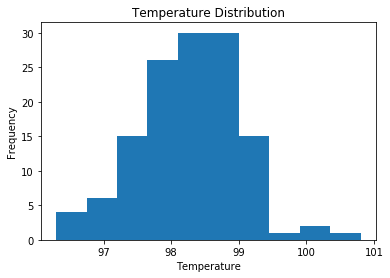

In [106]:
# Initially plot as a histogram
plt.hist(df.temperature)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

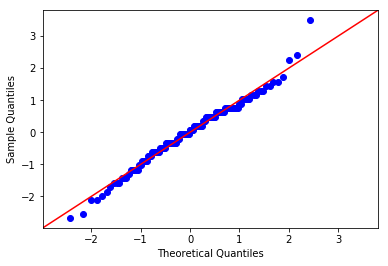

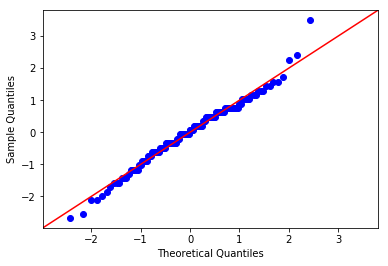

In [107]:
# And a quantile plot
temp = df.temperature
temp_mean = np.mean(temp)
temp_std = np.std(temp)
z = (temp - temp_mean) / temp_std
sm.qqplot(z, line='45')

In [108]:
# Looking at the data's distribution via scipy's normaltest() function.
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

**Answer:** 

Initial visualizations indicate relative normality. The normaltest() p-value result is well above the standard 0.05 which indicates we cannot reject the null hypothesis. The data is normally distributed and the Central Limit Theorem (CLT) applies.

### Excercise 2: Is the sample large enough and are the variables independent?

**Answer:** 

Initial examination of the dataset showed 130 samples. General consensus says n > 30 is sufficient for the CLT to apply. Therefore, the sample is large enough. As each reading is of a different individual, the variables are independent.



### Excercise 3: Is 98.6 the true population mean?

$H_{0}$ : The sample mean and the population mean (98.6) are the same.

$H_{A}$ : the sample mean the population mean are different.

**Bootstrap hypothesis testing**

In [109]:
# Generating bootstrap replicates and comparing differences between the observed and expected means

def bs_rep(data, func):
    """Generates a bootstrap replicate"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def diff_from_h0(data, h0_mean=98.6):
    """Calculates difference between observed and expected mean."""
    return np.mean(data) - h0_mean

def draw_bs_reps(data, func, size=1):
    """Generates multiple bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bs_rep(data, func)
    return bs_replicates

h0_mean = 98.6
temp_shifted = temp - temp_mean + h0_mean
diff_obs = diff_from_h0(temp)
bs_temps = draw_bs_reps(temp_shifted, diff_from_h0, 10000)

p = np.sum(bs_temps <= diff_obs) / 10000

print('p = %f' % p)

p = 0.000000


**Frequentist testing**

A one-sample test is used as we're comparing a sample to a single population mean. The population standard deviation is not known so we can approximate as the sample is large enough. Therefore, a z-test can be used. As the null hypothesis is that the sample mean does not equal the population mean, a two-tailed test is used.

In [110]:
# z-test
n = len(temp)
z = (temp_mean - h0_mean) / (temp_std / np.sqrt(n))
z

-5.4759252020785585

In [111]:
# Multiply by 2 in a two-tailed test
stats.norm.cdf(z) * 2

4.3523151658713056e-08

In [112]:
# t-test
t = (temp_mean - h0_mean) / (temp_std / np.sqrt(n))
t

-5.4759252020785585

In [113]:
t_crit = stats.t.ppf(0.05 / 2, n - 1)
t_crit

-1.9785244914586055

**Answer:**

The p-values of the bootstrap hypothesis test and the z-test were well below the standard cutoff of significance of 0.05 so the null hypothesis is rejected, and since |t| > |t*|, the t-test also supports that finding. In this case, the t statistic result was not different as the t distribution and normal distribution become more similar as the sample size increases.

### Excercise 4: Sample Size 10

In [114]:
np.random.seed(93)

bs_10 = np.random.choice(temp, 10)
bs_10_mean = np.mean(bs_10)

In [115]:
# z-test
z = (bs_10_mean - h0_mean) / (temp_std / np.sqrt(n))
z

-4.839468983415756

In [116]:
stats.norm.cdf(z) * 2

1.3018650626980103e-06

In [117]:
# t-test
t = (bs_10_mean - h0_mean) / (temp_std / np.sqrt(n))
t

-4.839468983415756

In [118]:
t_crit = stats.t.ppf(0.05 / 2, n - 1)
t_crit

-1.9785244914586055

**Answer:**

Since the sample size is much smaller, the t-test is correct to use. The smaller sample size causes the CLT to not hold true for the z-test to work.

### Excercise 5:  At what temperature should we consider someone's temperature to be "abnormal"?

**Frequentist approach**

In [119]:
# Margin of error based on z = +/- 1.96
me = 1.96 * temp_std / np.sqrt(n)
me

0.12555096480257902

In [120]:
ci = temp_mean + np.array([-1, 1]) * me
ci

array([98.1236798 , 98.37478173])

**Bootstrap approach**

In [121]:
temp_reps = draw_bs_reps(temp, np.mean, 10000)
bs_ci = np.percentile(temp_reps, [2.5, 97.5])
bs_ci

array([98.12461538, 98.37615385])

**Answer:**

We should consider a person's temperature abnormal when below ~98.12 or above ~98.37. The accepted mean of 98.6 does not fall within that interval. The null hypothesis is rejected.

### Excercise 6: Is there a significant difference betwen males and females in normal body temperature?

$H_{0}$: Male and female mean body temperatures are the same.

$H_{A}$: Male and female mean body temperatures are different.

In [129]:
male = df[df.gender == 'M']
female = df[df.gender == 'F']
male_mean = np.mean(male.temperature)
female_mean = np.mean(female.temperature)
male_std = np.std(male.temperature)
female_std = np.std(female.temperature)
male_n = len(male.temperature)
female_n = len(female.temperature)

z = (male_mean - female_mean) / np.sqrt(((male_std ** 2) / male_n) + ((female_std ** 2) / female_n))
z

-2.3032202891943516

In [130]:
p = stats.norm.cdf(z) * 2
p

0.021266451830110264

**Answer:**

As the sample sizes of both male and female are greater than 30, a z-test was used. As the alternate hypothesis is that they are different and not greater/lesser than, a two-tailed test was used. Since p < 0.05, we reject the null hypothesis. Mean male and female body temperatures are significantly different.